In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('rainfall in india 1901-2015.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

,count,mean,std,min,25%,50%,75%,max
YEAR,4116.0,1958.218659,33.140898,1901.0,1930.000,1958.0,1987.000,2015.0
JAN,4112.0,18.957320,33.585371,0.0,0.600,6.0,22.200,583.7
FEB,4113.0,21.805325,35.909488,0.0,0.600,6.7,26.800,403.5
MAR,4110.0,27.359197,46.959424,0.0,1.000,7.8,31.300,605.6
APR,4112.0,43.127432,67.831168,0.0,3.000,15.7,49.950,595.1
MAY,4113.0,85.745417,123.234904,0.0,8.600,36.6,97.200,1168.6
JUN,4111.0,230.234444,234.710758,0.4,70.350,138.7,305.150,1609.9
JUL,4109.0,347.214334,269.539667,0.0,175.600,284.8,418.400,2362.8
AUG,4112.0,290.263497,188.770477,0.0,155.975,259.4,377.800,1664.6
SEP,4110.0,197.361922,135.408345,0.1,100.525,173.9,265.800,1222.0


In [17]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [18]:
for col in df.columns:
    if df[col].dtype != "O":
        df[col].fillna(df[col].mean(),inplace=True)

In [19]:
months = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]

In [20]:
print(f"Minimum Rainfall :\n{df[df.ANNUAL == df.ANNUAL.min()][['SUBDIVISION','YEAR', 'ANNUAL']]} mm")
print(f"Maximum Rainfall :\n{df[df.ANNUAL == df.ANNUAL.max()][['SUBDIVISION','YEAR', 'ANNUAL']]} mm")

Minimum Rainfall :
         SUBDIVISION  YEAR  ANNUAL
1834  WEST RAJASTHAN  1918    62.3 mm
Maximum Rainfall :
           SUBDIVISION  YEAR  ANNUAL
142  ARUNACHAL PRADESH  1948  6331.1 mm


Text(0.5, 1.0, 'Yearly average rainfall')

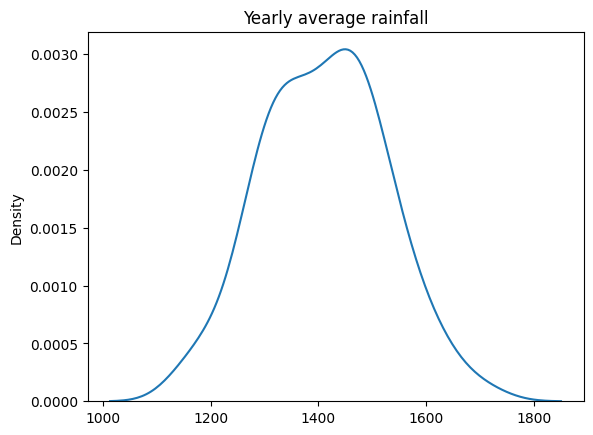

In [21]:
yearly_rain = df.groupby("YEAR")["ANNUAL"].mean()
sns.kdeplot(yearly_rain.values)
plt.title("Yearly average rainfall")

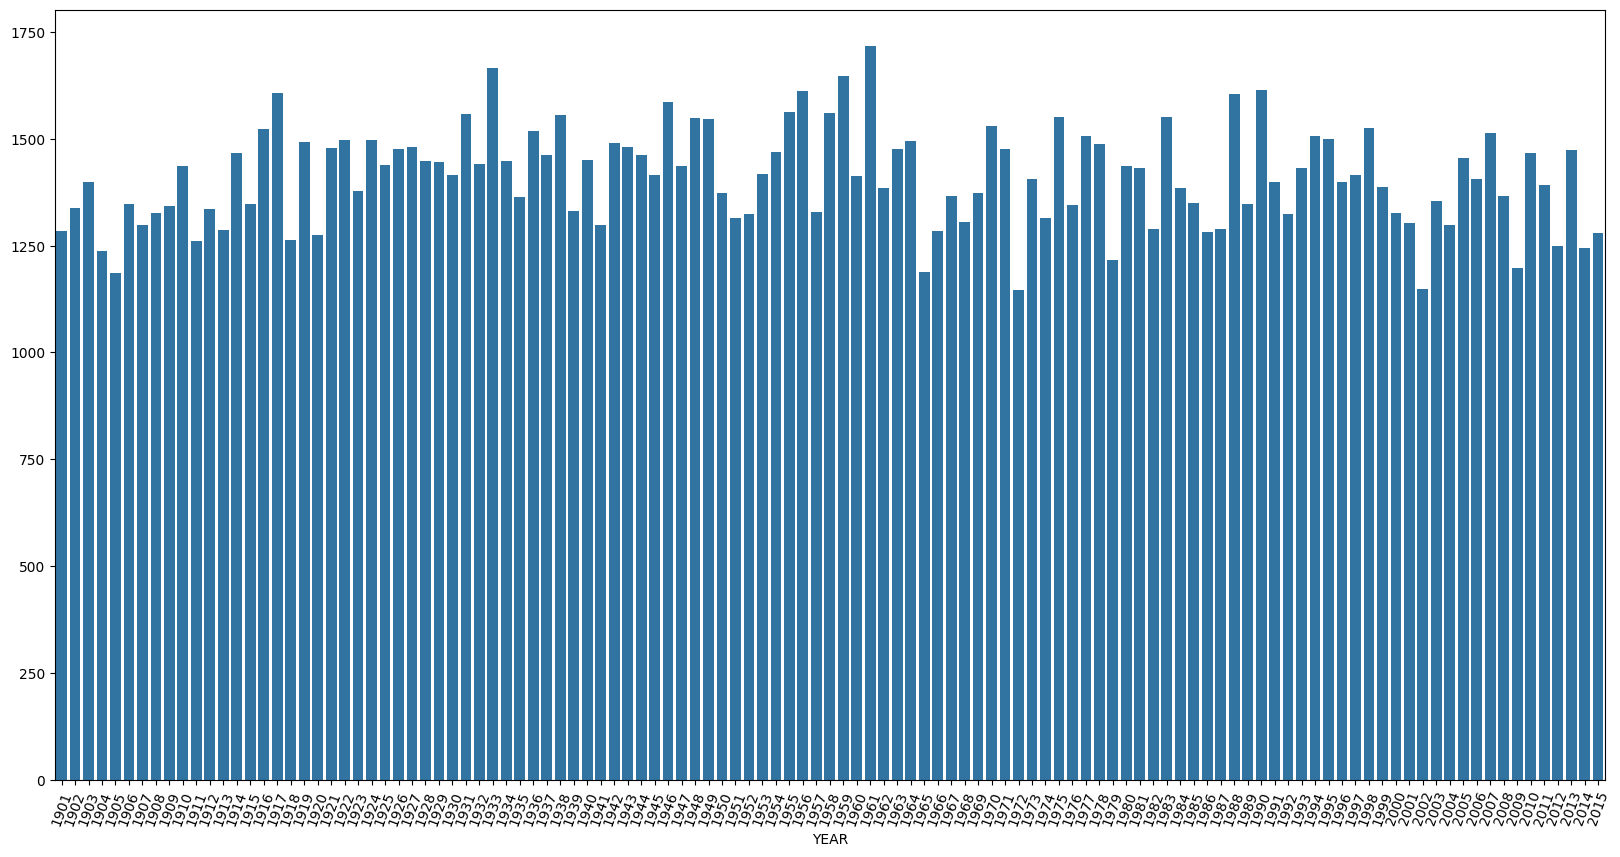

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=yearly_rain.index,y=yearly_rain.values)
plt.xticks(rotation=70)
plt.show()

In [23]:
sub_rain = df.groupby("SUBDIVISION")["ANNUAL"].mean().reset_index()
print(f"Subdivision recieving maximum rainfall :\n {sub_rain[sub_rain['ANNUAL'] ==sub_rain['ANNUAL'].max()]}")

Subdivision recieving maximum rainfall :
          SUBDIVISION       ANNUAL
6  COASTAL KARNATAKA  3391.040947


In [24]:
print(f"Subdivision recieving minimum rainfall :\n {sub_rain[sub_rain['ANNUAL'] ==sub_rain['ANNUAL'].min()]}")

Subdivision recieving minimum rainfall :
        SUBDIVISION      ANNUAL
34  WEST RAJASTHAN  292.673043


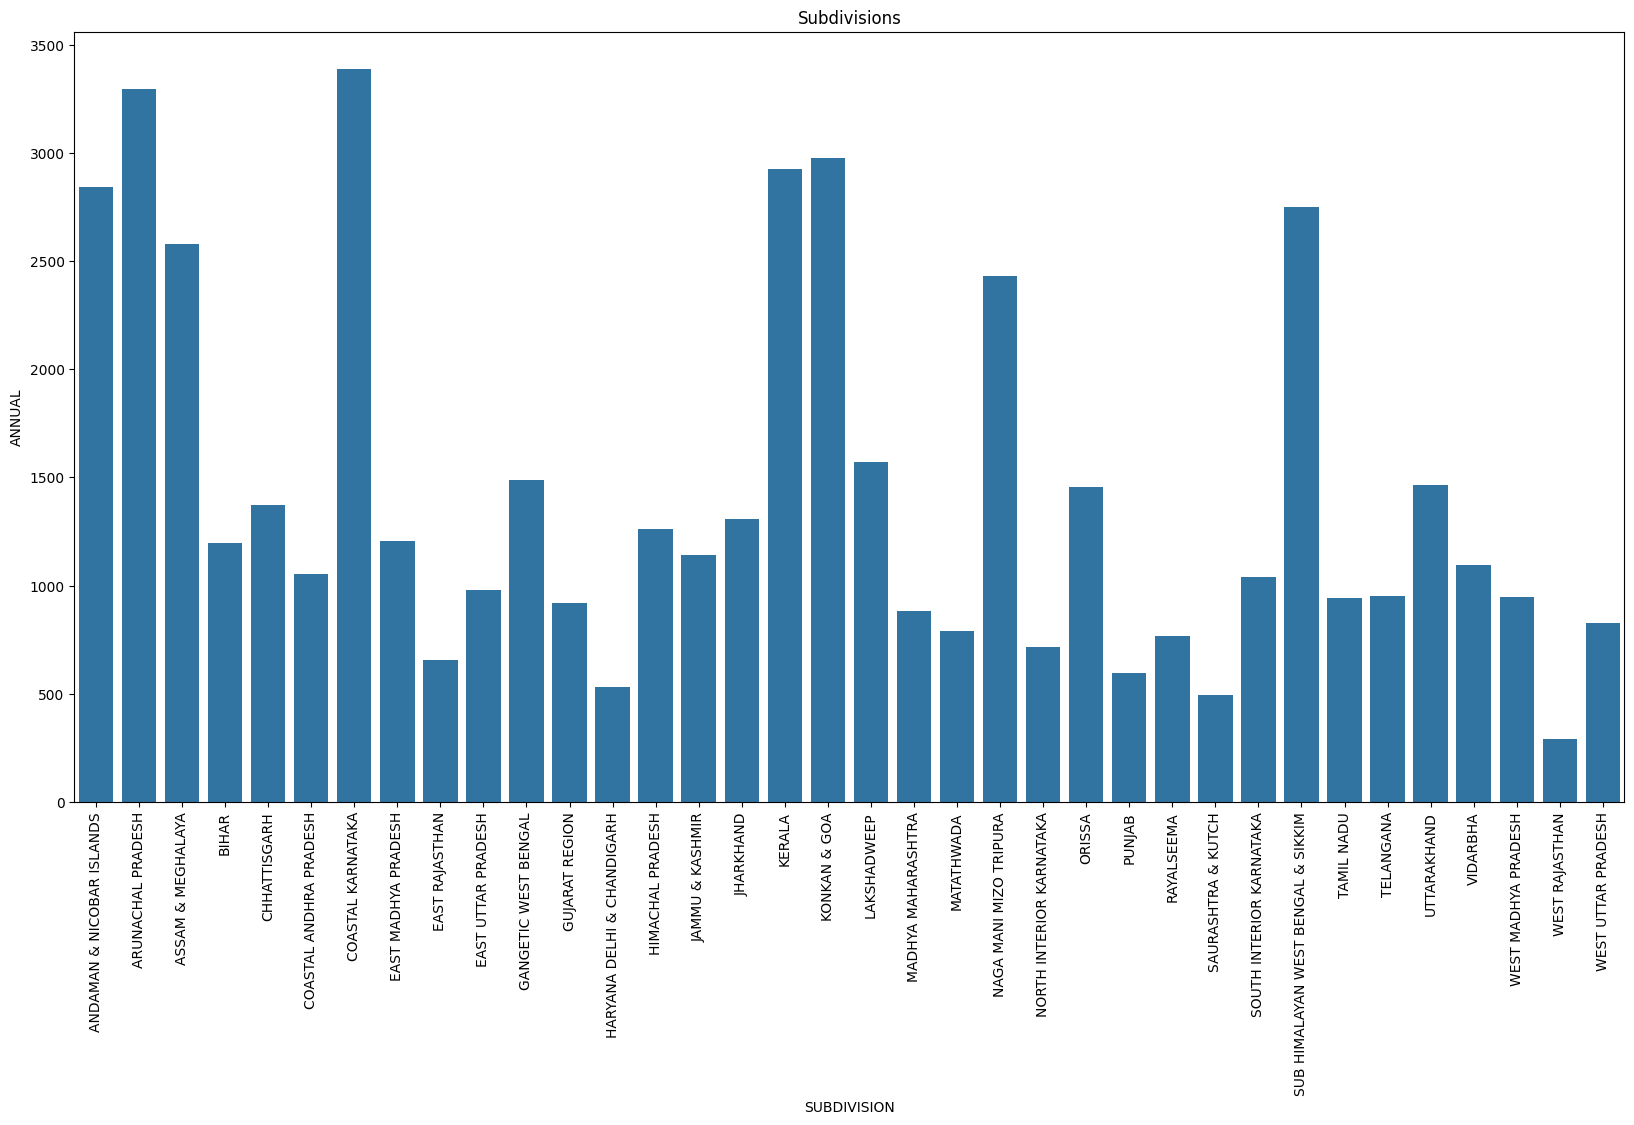

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(data=sub_rain,x="SUBDIVISION",y='ANNUAL')
plt.title("Subdivisions")
plt.xticks(rotation=90)
plt.show()

In [26]:
print(f"Top 5 divisions reciving maximum rainfall :\n {df.groupby('SUBDIVISION')['ANNUAL'].mean().sort_values(ascending=False)[:5]}")

Top 5 divisions reciving maximum rainfall :
 SUBDIVISION
COASTAL KARNATAKA            3391.040947
ARUNACHAL PRADESH            3294.660344
KONKAN & GOA                 2977.686087
KERALA                       2925.487826
ANDAMAN & NICOBAR ISLANDS    2844.725031
Name: ANNUAL, dtype: float64


In [27]:
month_rain = df.groupby("SUBDIVISION")[months].mean()
max_rain = pd.DataFrame([month_rain.idxmax(),month_rain.max()])
max_rain

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,JAMMU & KASHMIR,JAMMU & KASHMIR,ARUNACHAL PRADESH,ARUNACHAL PRADESH,ARUNACHAL PRADESH,COASTAL KARNATAKA,COASTAL KARNATAKA,COASTAL KARNATAKA,ANDAMAN & NICOBAR ISLANDS,KERALA,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS
1,102.030435,115.450435,150.925963,263.836082,358.52268,841.326087,1127.028696,713.618261,432.878962,294.122609,230.219385,149.482834


In [28]:
monthly_rain=max_rain.T
monthly_rain

,0,1
JAN,JAMMU & KASHMIR,102.030435
FEB,JAMMU & KASHMIR,115.450435
MAR,ARUNACHAL PRADESH,150.925963
APR,ARUNACHAL PRADESH,263.836082
MAY,ARUNACHAL PRADESH,358.52268
JUN,COASTAL KARNATAKA,841.326087
JUL,COASTAL KARNATAKA,1127.028696
AUG,COASTAL KARNATAKA,713.618261
SEP,ANDAMAN & NICOBAR ISLANDS,432.878962
OCT,KERALA,294.122609


In [29]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')